In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import KFold, train_test_split

from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

# 1. Loading Dataset

In [3]:
data=pd.read_excel("/home/deepesh/Downloads/19_Combined power plant dataset-20201204T035108Z-001/19_Combined power plant dataset/CCPP.zip (Unzipped Files)/CCPP/Folds5x2_pp.xlsx")

In [4]:
print(data.info())
print('-----'*20)
print('First five samples of the dataset')
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None
----------------------------------------------------------------------------------------------------
First five samples of the dataset

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


* All the independent variables are numerical data type and it doesnt have any null values.
* The dependent variable is PE - Electrical energy ouput is also an numeric type without null values.

In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Attribute Information: Features consist of hourly average ambient variables

* Temperature (AT) in the range 1.81°C and 37.11°C
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
* Net hourly electrical energy output (EP) 420.26-495.76 MW

# Exploratory Data Analysis

#### Box plot of the independent variables 

Text(0.5, 1.0, 'RH')

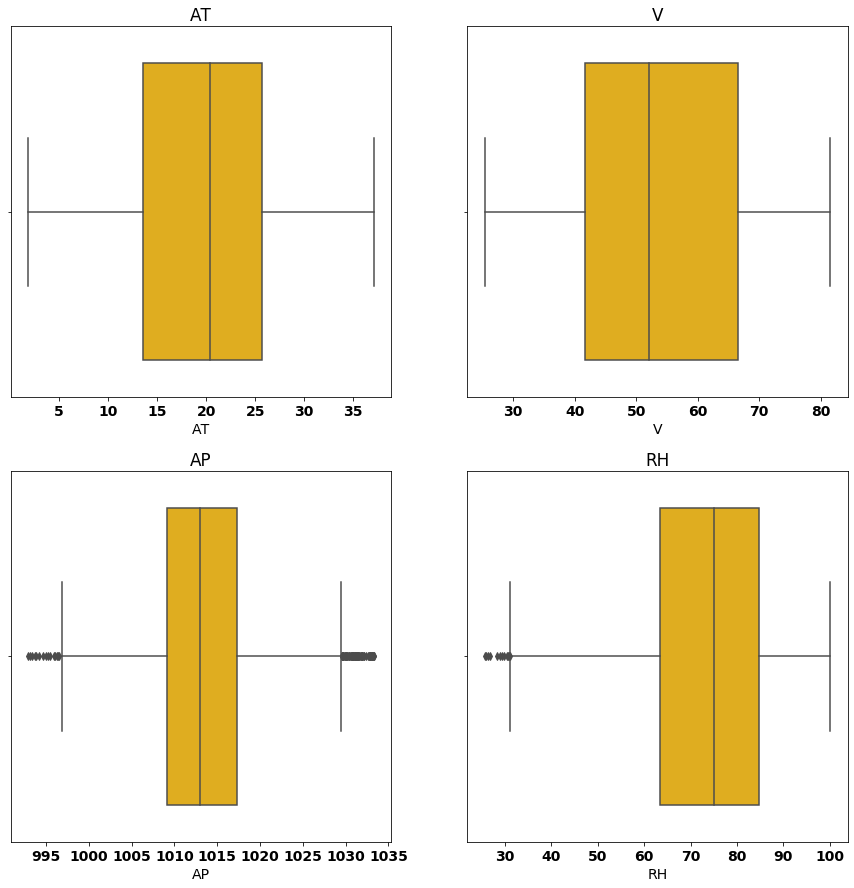

In [6]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(221)
sns.boxplot(x='AT',data=data,palette='Wistia',ax=ax)
ax.set_title('AT')

ax = f.add_subplot(222)
sns.boxplot(x='V',data=data,palette='Wistia',ax=ax)
ax.set_title('V')

ax = f.add_subplot(223)
sns.boxplot(x='AP',data=data,palette='Wistia',ax=ax)
ax.set_title('AP')

ax = f.add_subplot(224)
sns.boxplot(x='RH',data=data,palette='Wistia',ax=ax)
ax.set_title('RH')

* No outliers for predictor AT
* No outliers for predictor V.
* There are outliers for predictor RH. Outliers are the values less than 30.
* There are outliers for predictor AP. Outliers are the values less than 997 and greater than 1030.

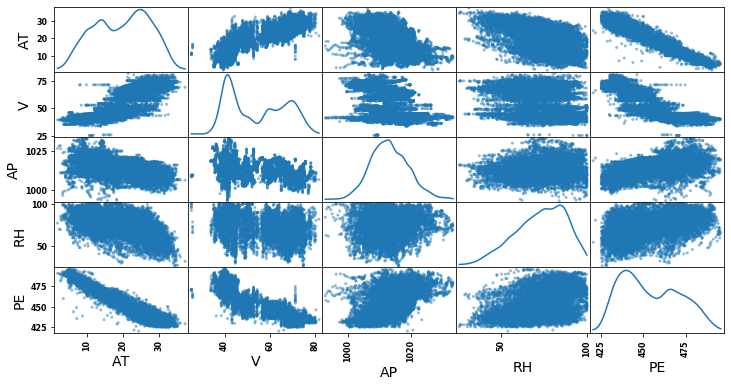

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, diagonal="kde");

In this matrix, the diagonal contains a plot of the distribution of each variable. We observe that:

* There is an approximately linear relationship between PE and the negative of AT

* there is an approximately linear relationship between PE and negative of V

It can be inferred from the scatter plots that the feature AT and V have a significant linear relationship with the response variable. The features AP and RH are not that closely linearly related to the response.

* AT - Temperature is more or less normally distributed.
* AP - Pressure is normally distrubuted
* RH - Humidity is left skewed.
* PE - It has 2 peaks with normally distributed plot.

##### Null or Missing value checking

In [8]:
print("Is there a null value in Train data? {}".format(data.isnull().sum().any()))

Is there a null value in Train data? False


No missing or NULL value in the dataset.

#### Correlation between the attributes

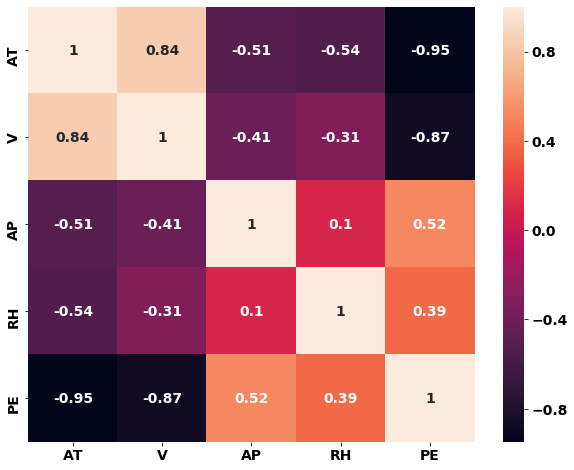

In [9]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)
plt.show()

* Relation between AT vs V has strong positive correlation as 0.84.

#### Augmented Dickey Fuller Test to check whether PE is time dependent or not

Augmented Dickey Fuller test (ADF Test) is a statistical test used to test whether a given Time series is stationary or not.
It is from the test statistic and the p-value, we can make an inference as to whether a given series is stationary or not.
Null hypothesis: PE is time dependent(non-stationary).
Alternate hypothesis: PE is time independent(stationary).
    
If the p-value is less than the significance level, we reject the null hypothesis and infer that PE is stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller

y_val = data.PE.values
result = adfuller(y_val)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -98.289747
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


0 p-value, lower than 1% crit val. We can safely reject the null-hypothesis that the PE is time dependent.

# Data Normalization

In [11]:
min_max_scaler = preprocessing.StandardScaler()
data1=data[['AT','V','AP','RH']]
data1=min_max_scaler.fit_transform(data1)
data1=pd.DataFrame(data1)
# data1.columns=['AT','V','AP','RH']
data[['AT','V','AP','RH']]=data1

In [12]:
data.head()

,AT,V,AP,RH,PE
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [13]:
import statsmodels.api as sm
X = data['AT']
y = data['PE']
X_new = sm.add_constant(X)
est = sm.OLS(y, X_new)
est_new = est.fit()
print(est_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.055   8191.480      0.0

/home/deepesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


* From the above summary, this can be infered that AT is a significant feature as the p-value for AT is less than 0.05.
* R_squared=0.899


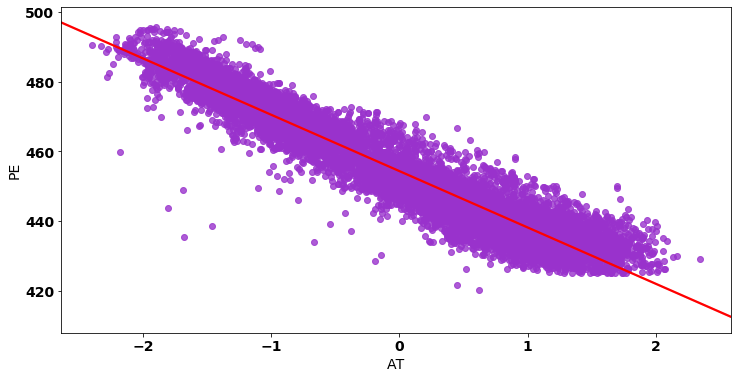

In [14]:
sns.regplot(x='AT', y='PE', data=data, color='darkorchid', line_kws={'color':'red'})

In [15]:
import statsmodels.api as sm
X = data['V']
y = data['PE']
X_new = sm.add_constant(X)
est = sm.OLS(y, X_new)
est_new = est.fit()
print(est_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:23   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.086   5277.182      0.0

* From the above summary, this can be infered that V is a significant feature as the p-value for AT is less than 0.05.
* R_squared=0.757

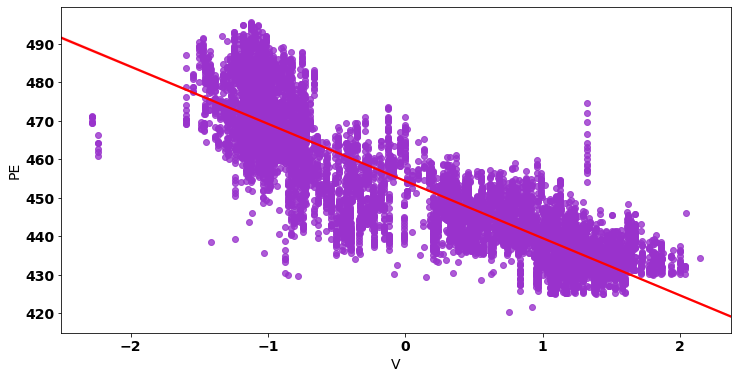

In [16]:
sns.regplot(x='V', y='PE', data=data, color='darkorchid', line_kws={'color':'red'})

In [17]:
import statsmodels.api as sm
X = data['AP']
y = data['PE']
X_new = sm.add_constant(X)
est = sm.OLS(y, X_new)
est_new = est.fit()
print(est_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:25   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.149   3045.147      0.0

* From the above summary, this can be infered that AP is a significant feature as the p-value for AT is less than 0.05.
* R_squared=0.269

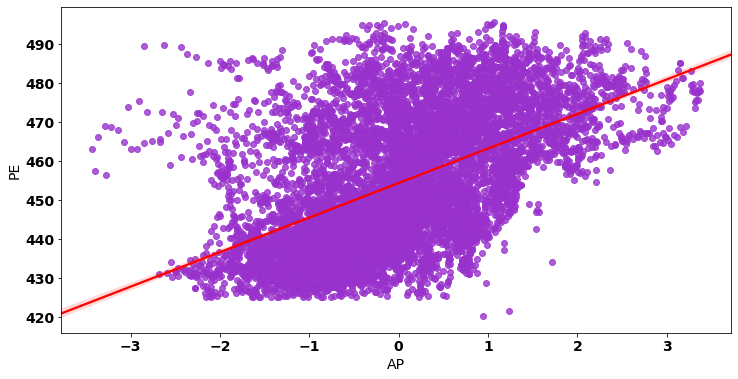

In [18]:
sns.regplot(x='AP', y='PE', data=data, color='darkorchid', line_kws={'color':'red'})

In [19]:
import statsmodels.api as sm
X = data['RH']
y = data['PE']
X_new = sm.add_constant(X)
est = sm.OLS(y, X_new)
est_new = est.fit()
print(est_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.161   2827.628      0.0

* From the above summary, this can be infered that RH is a significant feature as the p-value for AT is less than 0.05.
* R_squared=0.152

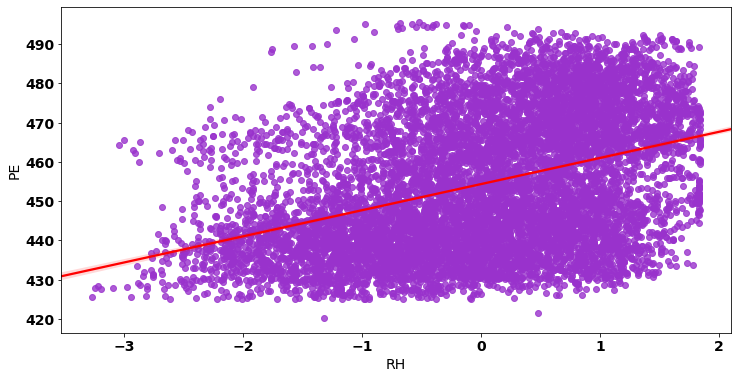

In [20]:
sns.regplot(x='RH', y='PE', data=data, color='darkorchid', line_kws={'color':'red'})

In [21]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

X_new = sm.add_constant(X)
est = sm.OLS(y, X_new)
est_new = est.fit()
print(est_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:29   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3650      0.047   9750.142      0.0

* P-value of all the independent variables is less than 0.05, So all are significant.
* R_Squared=0.929

# Model Building

In this step build model using our linear regression equation  $ θ=(XTX)−1XTy $. In first step we need to add a feature  x0=1  to our original data set.

In [22]:
X = data.drop('PE',axis=1) # Independet variable
y = data['PE'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [23]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
y_train=y_train.values.reshape(y_train.shape[0],1)

# # Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [24]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
theta=theta.reshape(theta.shape[0])
parameter_df = pd.DataFrame({'Parameter':parameter,'theta':theta})

In [25]:
print(parameter_df)

  Parameter       theta
0   theta_0  454.343488
1   theta_1  -14.561446
2   theta_2   -3.092156
3   theta_3    0.393396
4   theta_4   -2.233959


# Model Evaluation

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
J(θ)=1m∑i=1m(y^i−yi)2
 
R2 is statistical measure of how close data are to the fitted regression line.R2 is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

R2=1−SSESST
 
SSE = Sum of Square Error
SST = Sum of Square Total
SSE=∑i=1m(y^i−yi)2
 
SST=∑i=1m(yi−y¯i)2
 
Here  y^  is predicted value and  y¯  is mean value of  y .

In [26]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  20.200280077790058
R square obtain for normal equation method is : 0.9315977159014461


# Validating Regression Model

* Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
* The residual error plot should be normally distributed.
* The mean of residual error should be 0 or close to 0 as much as possible
* The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
* Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=1/(1−R2) , If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.
* Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

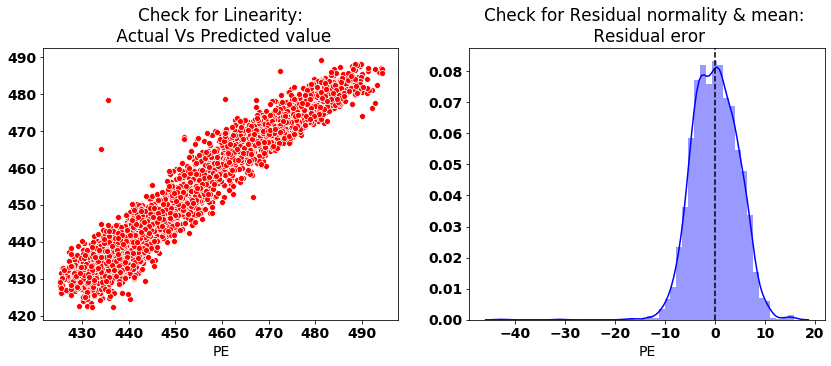

In [27]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_norm,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_norm),ax=ax,color='b')
ax.axvline((y_test - y_pred_norm).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

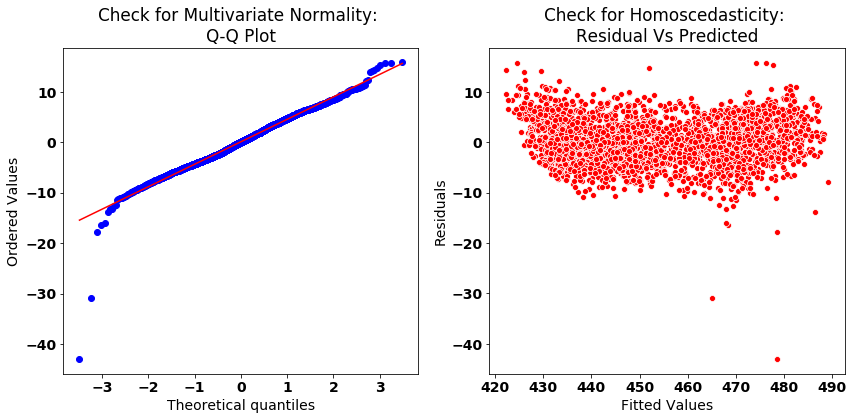

In [28]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_norm),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_norm), x= y_pred_norm, ax = ax[1],color='r')
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
# Check for Multicollinearity
#Variance Inflation Factor
X = data.iloc[:,:-1]
v=calc_vif(X)
print(v)
VIF = 1/(1- R_square)
print('Overall VIF=',VIF)

  variables       VIF
0        AT  5.977602
1         V  3.943003
2        AP  1.452639
3        RH  1.705290
Overall VIF= 14.61939485177428


* In our model the actual vs predicted plot is almost linear.
* The residual mean is zero.
* Q-Q plot is not showing almost straight line which means both set of Quantiles come from the same distribution.
* The plot is showing homoscedastic.
* Variance inflation factor value is greater than 5, so multicollearity.

# Residual Plots

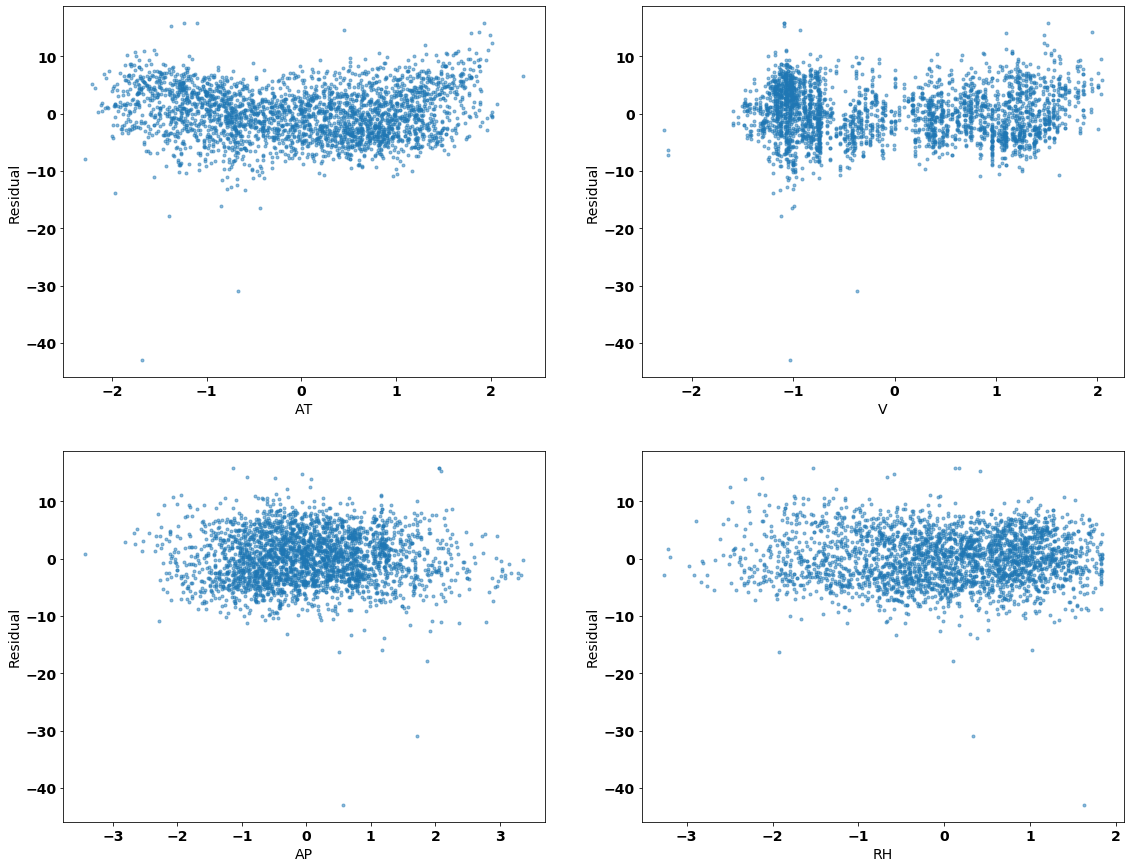

In [31]:
f = plt.figure(figsize=(19,15))

ax = f.add_subplot(221)
residuals = y_test - y_pred_norm
plt.plot(X_test.AT, residuals, ".", alpha=0.5)
ax.set_xlabel("AT")
ax.set_ylabel("Residual");

ax = f.add_subplot(222)
residuals = y_test - y_pred_norm
plt.plot(X_test.V, residuals, ".", alpha=0.5)
ax.set_xlabel("V")
ax.set_ylabel("Residual");

ax = f.add_subplot(223)
residuals = y_test - y_pred_norm
plt.plot(X_test.AP, residuals, ".", alpha=0.5)
ax.set_xlabel("AP")
ax.set_ylabel("Residual");

ax = f.add_subplot(224)
residuals = y_test - y_pred_norm
plt.plot(X_test.RH, residuals, ".", alpha=0.5)
ax.set_xlabel("RH")
ax.set_ylabel("Residual");

Indeed, except for a minor quadratic shape to the residuals of variable AT, the residuals look random, without any systematic feature apparent

In [32]:
# !pip3 install factor_analyzer --user

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data.iloc[:,:-1])
chi_square_value, p_value

(19891.617180260186, 0.0)

In [36]:
from statsmodels.stats.stattools import durbin_watson 
residuals = y_test - y_pred_norm
dw = durbin_watson(residuals) 
print(dw)

[1.95683257]


# PCA

#### Scree plot for finding number of PCs to be retained

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[2.43881669 0.90896534 0.55006147 0.1025746 ]


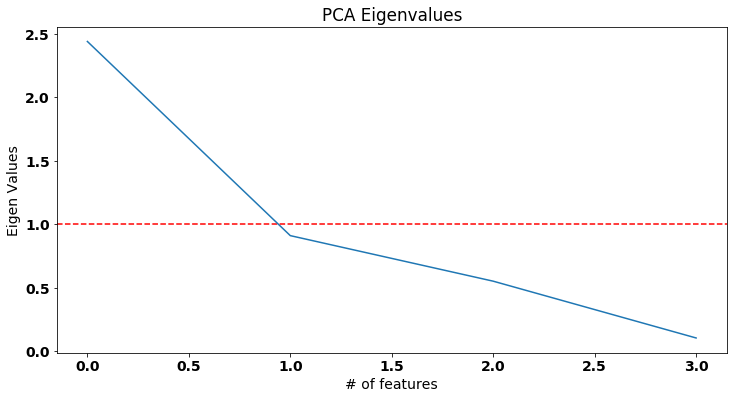

In [33]:
from sklearn.decomposition import PCA

X = data.drop('PE',axis=1) # Independet variable
y = data['PE'] # dependent variable
pca = PCA(n_components=len(X.columns))
pca.fit(X)

print(pca)
print(pca.explained_variance_)

plt.ylabel('Eigen Values')
plt.xlabel('# of features')
plt.title('PCA Eigenvalues')
plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

* Eigen value 1 is greater than 1
* Eigen value 2 is apprximately 1.
* Eigen value 3 and 4 are much less than 1. 

This suggest that 2 principal components should be preserved.

#### Applying PCA with n_components=2

In [34]:
X = data.drop('PE',axis=1) # Independet variable
y = data['PE'] # dependent variable
pca = PCA(2)
pca.fit(X)

X_tran = pca.transform(X)
X_tran1=pd.DataFrame(X_tran)

X_tran1.columns=['new_variable1','new_variable2']
v=calc_vif(X_tran1)
print(v)

X_train, X_test, y_train, y_test = train_test_split(X_tran,y,test_size=0.3,random_state=23)

X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
y_train=y_train.values.reshape(y_train.shape[0],1)

theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

       variables  VIF
0  new_variable1  1.0
1  new_variable2  1.0


In [35]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)
y_test=y_test.values.reshape(y_test.shape[0],1)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

VIF = 1/(1- R_square)
print('After VIF', VIF)

The Mean Square Error(MSE) or J(theta) is:  46.02471677751575
R square obtain for normal equation method is : 0.8441508860051644
After VIF 6.416462528193374


After Applying PCA with n_components=2, the VIF is reduced from 14.62  to 6.41, Which shows that multicollinearity decreased. However the R_square value decreased and MSE value increased. 